# Step 1: Reading and Understanding the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, make_scorer
)
from sklearn.metrics import roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/breast_cancer.csv")

In [4]:
df.head()

,diagnosis,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193
1,1,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.013890,0.003532
2,1,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.022500,0.004571
3,1,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.052208,0.009208
4,1,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.017560,0.005115


| Column Name         | Description (English)                                       | Description (German)                                                                      |
|---------------------|-------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| radius_se           | Standard error for the mean of distances from center to points on the perimeter | Standardfehler des Mittelwerts der Entfernungen vom Zentrum zu Punkten am Umfang         |
| texture_se          | Standard error for standard deviation of gray-scale values  | Standardfehler für die Standardabweichung der Grauwerte                                   |
| smoothness_se       | Standard error for local variation in radius lengths        | Standardfehler für lokale Variation der Radienlängen                                      |
| compactness_se      | Standard error for perimeter^2 / area - 1.0                 | Standardfehler für Umfang^2 / Fläche - 1.0                                                |
| concavity_se        | Standard error for severity of concave portions of the contour | Standardfehler für die Schwere der konkaven Teile der Kontur                              |
| concave points_se   | Standard error for number of concave portions of the contour | Standardfehler für die Anzahl der konkaven Teile der Kontur                               |
| symmetry_se         | Standard error for symmetry                                 | Standardfehler für Symmetrie                                                              |
| fractal_dimension_se| Standard error for "coastline approximation" - 1            | Standardfehler für die "Küstenlinienapproximation" - 1                                    |


212: malignant
357: benign

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_se             569 non-null    float64
 2   texture_se            569 non-null    float64
 3   smoothness_se         569 non-null    float64
 4   compactness_se        569 non-null    float64
 5   concavity_se          569 non-null    float64
 6   concave points_se     569 non-null    float64
 7   symmetry_se           569 non-null    float64
 8   fractal_dimension_se  569 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 40.1 KB


In [6]:
df.isna().sum()

diagnosis               0
radius_se               0
texture_se              0
smoothness_se           0
compactness_se          0
concavity_se            0
concave points_se       0
symmetry_se             0
fractal_dimension_se    0
dtype: int64

# Step 2: Data Preprocessing

In [7]:
df.head()

,diagnosis,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193
1,1,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.013890,0.003532
2,1,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.022500,0.004571
3,1,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.052208,0.009208
4,1,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.017560,0.005115


### Analyze the target value

In [8]:
df.shape

(569, 9)

In [9]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

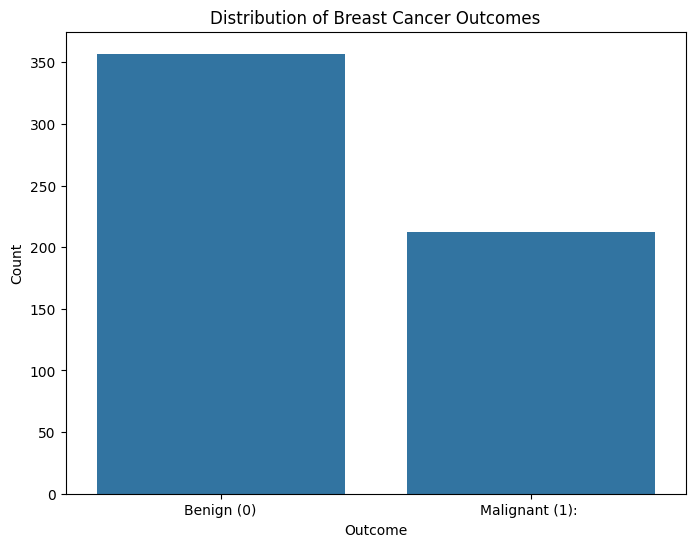

In [10]:
outcome_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of Breast Cancer Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1): '])
plt.show()

### Violinplot

In [11]:
y = df['diagnosis']
drop_columns = ['diagnosis']
x = df.drop(columns=drop_columns)
scaler = StandardScaler()
data_n = scaler.fit_transform(x)
data = pd.DataFrame(data_n, columns=x.columns)
data = pd.concat([y, data], axis=1)

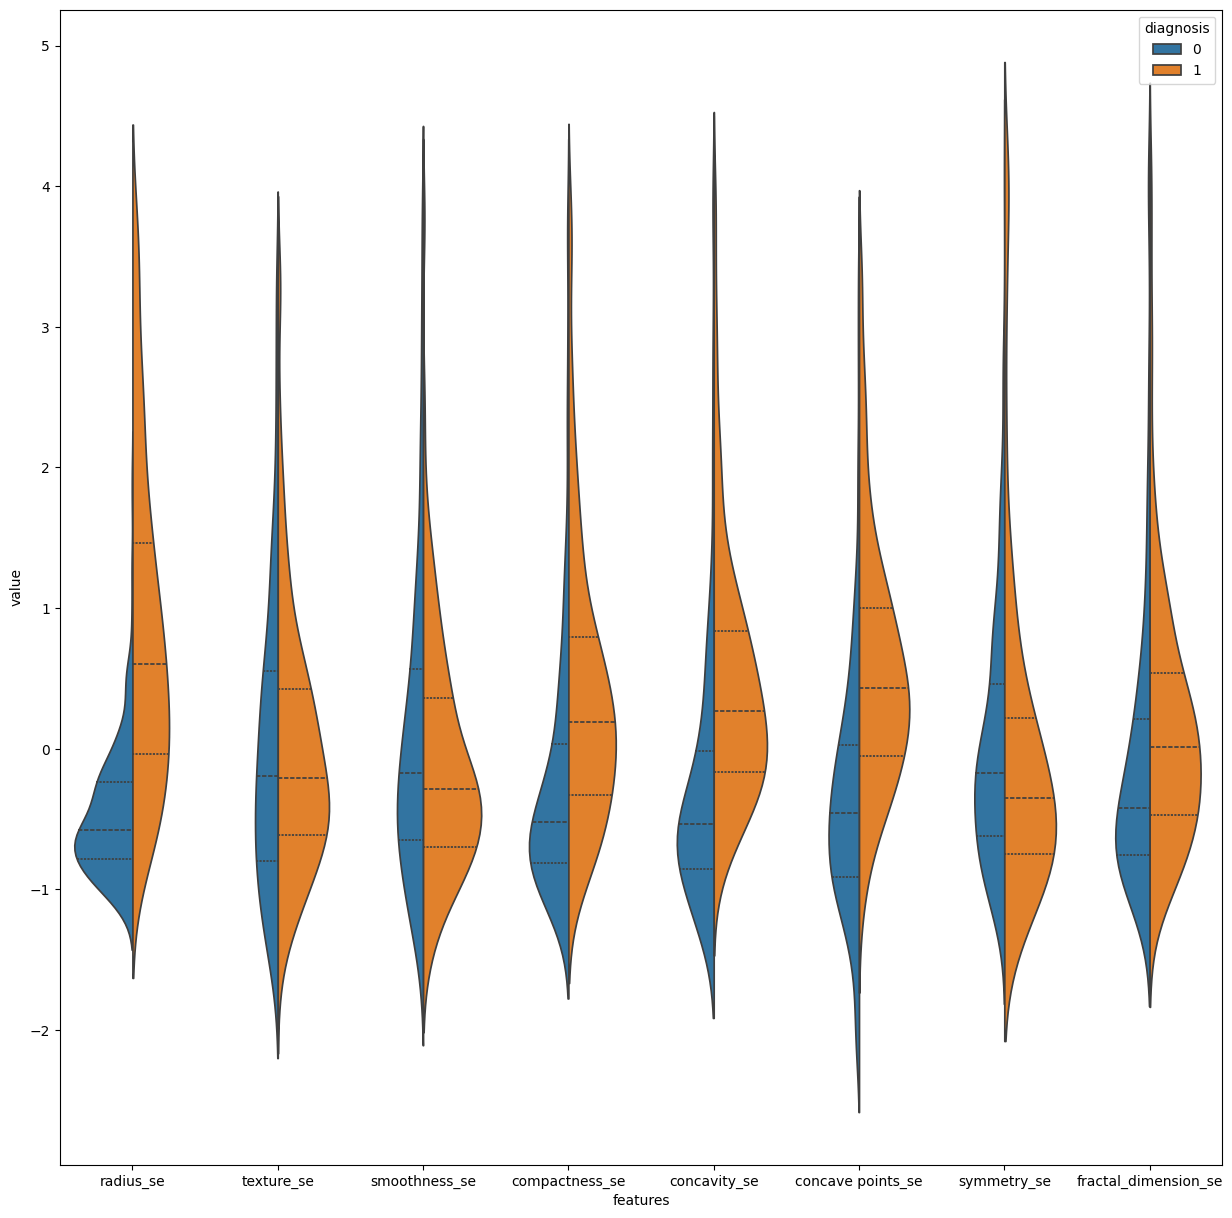

In [12]:
feature_groups = [(0, 10)]
for start, end in feature_groups:
    features = df.columns[start:end]
    melted_data = pd.melt(data, id_vars="diagnosis", value_vars=features, var_name="features", value_name='value')
    
    plt.figure(figsize=(15, 15))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_data, split=True, inner="quart")
    plt.xticks(rotation=0)
    plt.show()

In [13]:
df.head()


,diagnosis,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193
1,1,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.013890,0.003532
2,1,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.022500,0.004571
3,1,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.052208,0.009208
4,1,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.017560,0.005115


## Correlation analysis

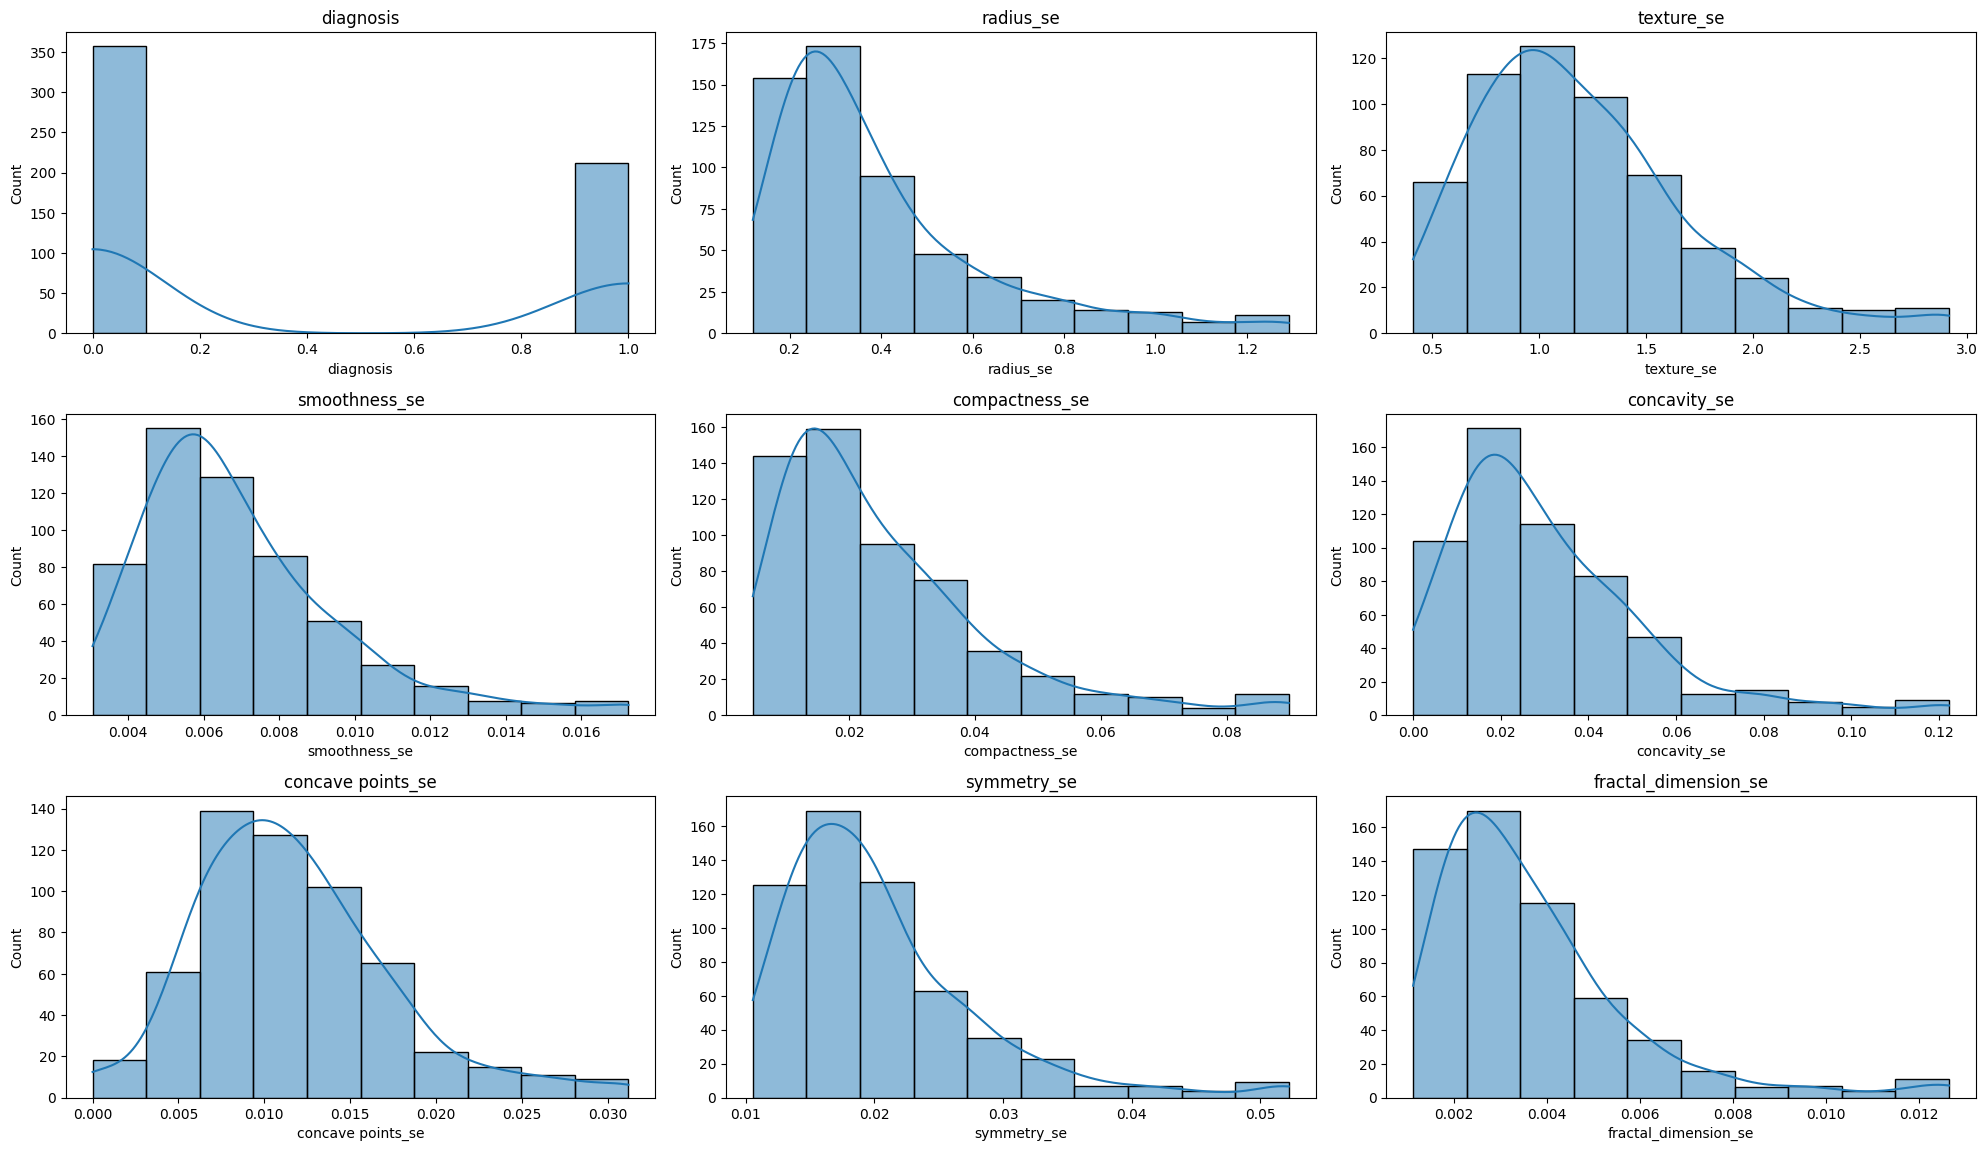

In [14]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

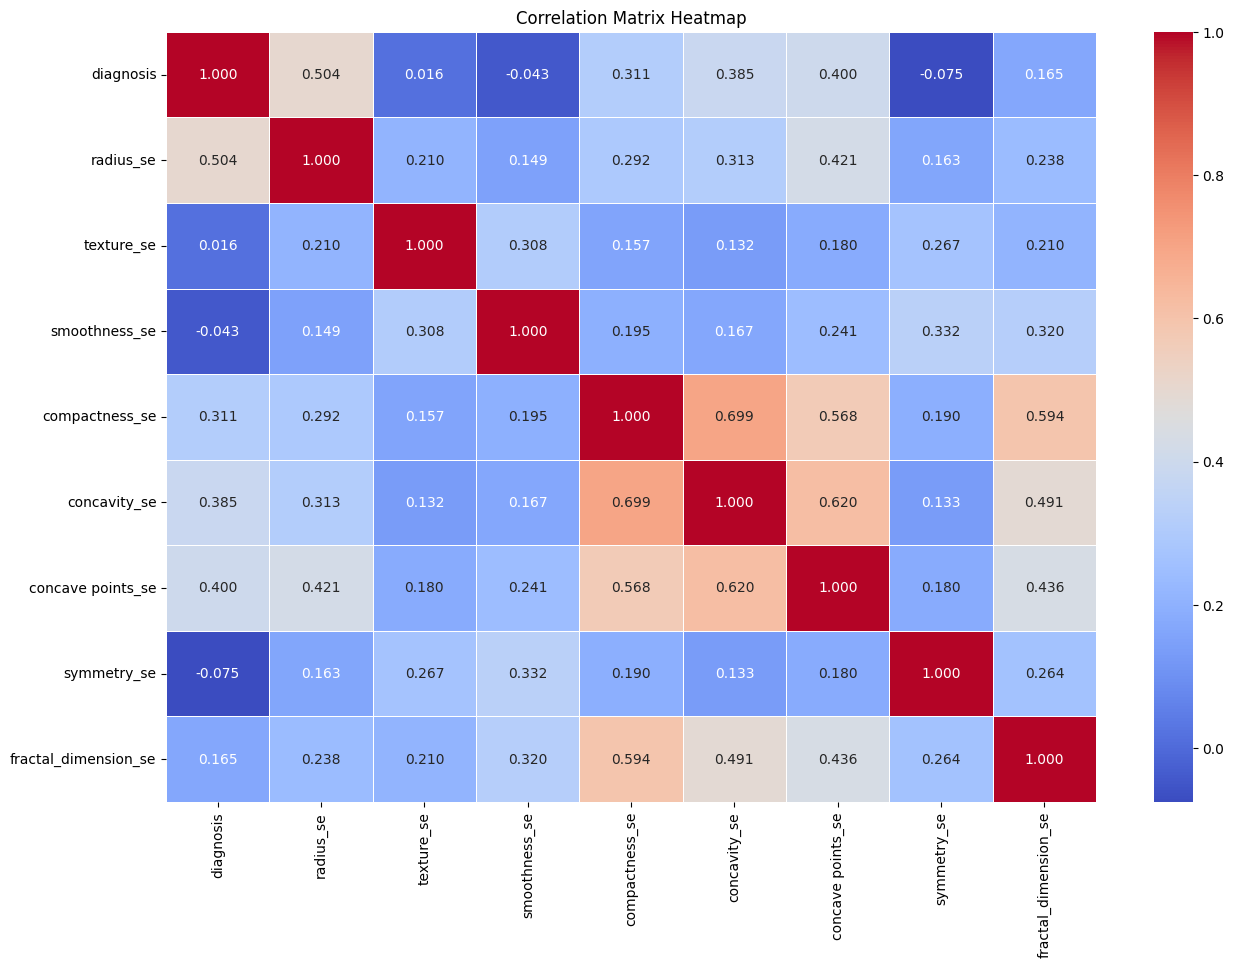

In [15]:
#method: {'pearson', 'kendall', 'spearman'}
correlation_matrix = df.corr(method= 'kendall')
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.95):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_columns=high_correlated_cols(df)
high_correlated_columns

[]

In [17]:
df = df.drop(high_correlated_columns, axis=1)

### Eliminating the outlie

### Boxplot

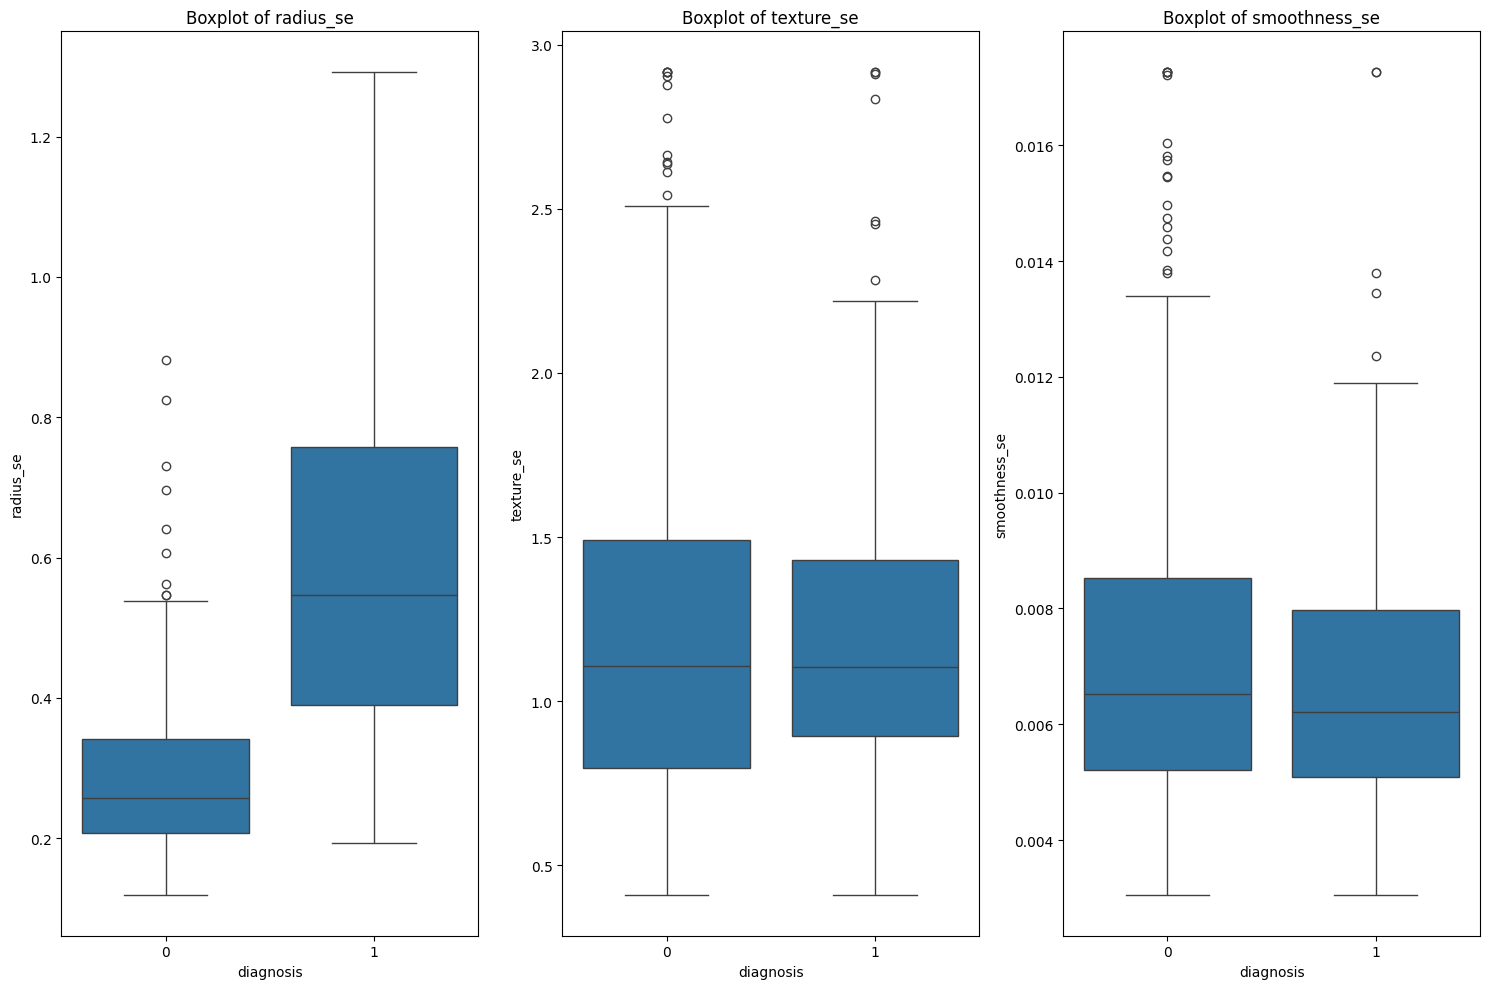

In [18]:
# Keeping only selected columns
columns_to_keep = ['diagnosis', 'radius_se', 'texture_se', 'smoothness_se' ]
df_selected = df[columns_to_keep]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns_to_keep[1:]):  # Skip 'diagnosis' for plotting
    plt.subplot(1, len(columns_to_keep) - 1, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df_selected)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [19]:
def find_outlier_columns(df, q1_value, q2_value):
    """
    Identify columns in the DataFrame that contain outliers.

    :param df: A pandas DataFrame.
    :return: A list of column names that have outliers.
    """
    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number']).columns
    # q1_value=0.25
    # q2_value=0.75
    for col in numerical_cols:
        Q1 = df[col].quantile(q1_value)
        Q3 = df[col].quantile(q2_value)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

In [70]:
find_outlier_columns(df, 0.05, 0.99)



[]

<div class="alert alert-success">

### English
**Change the find_outlier_columns(df, 0.05, 0.99) parameter and explain the results**

### Deutsch
**Ändern Sie den Parameter find_outlier_columns(df, 0.05, 0.99) und erklären Sie die Ergebnisse**

</div>

 # Step 3 Model training and  prediction

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [22]:

X = df.drop('diagnosis', axis=1)
y = df[["diagnosis"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [23]:
X_train.head()

,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
437,0.3892,1.0460,0.007976,0.012950,0.01608,0.009046,0.02005,0.002830
200,0.3534,1.3260,0.007514,0.017790,0.01401,0.011400,0.01503,0.003338
7,0.5835,1.3770,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412
292,0.2094,0.7636,0.008725,0.020030,0.02335,0.011320,0.02625,0.004726
538,0.3777,1.4620,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872


In [24]:
X_train.columns

Index(['radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

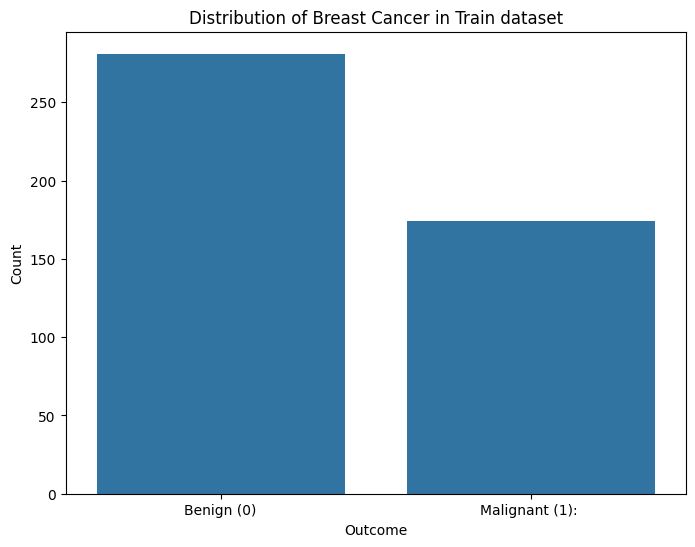

In [25]:
outcome_counts = y_train['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of Breast Cancer in Train dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1): '])
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

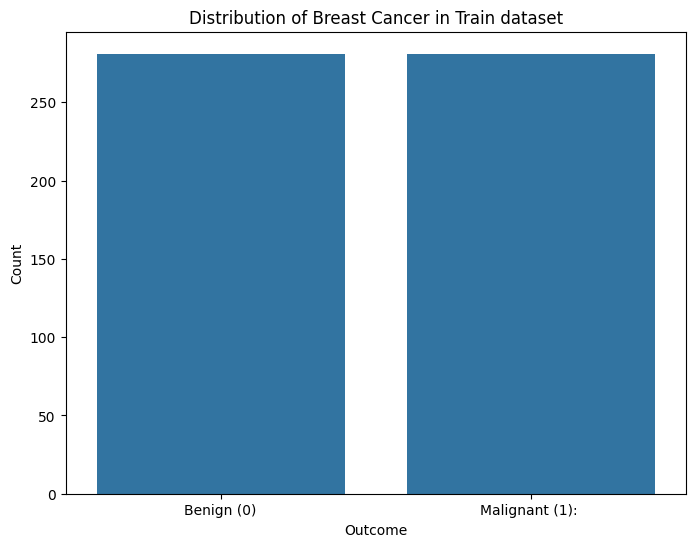

In [27]:
outcome_counts = y_train['diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of Breast Cancer in Train dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1): '])
plt.show()

### Scaling

In [28]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Getting the Optimal Number of Clusters

In [29]:
# Hyperparameter Tuning
param_grid = {'n_neighbors': range(1, 30),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Cross-Validation
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [30]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
mean_score = scores.mean()
print(f'This is the scores {scores} and the mean score is {mean_score}')

This is the scores [0.83185841 0.84070796 0.82142857 0.91071429 0.91964286] and the mean score is 0.8648704171934259


## Choosing the value of k visually on the Test dataset 

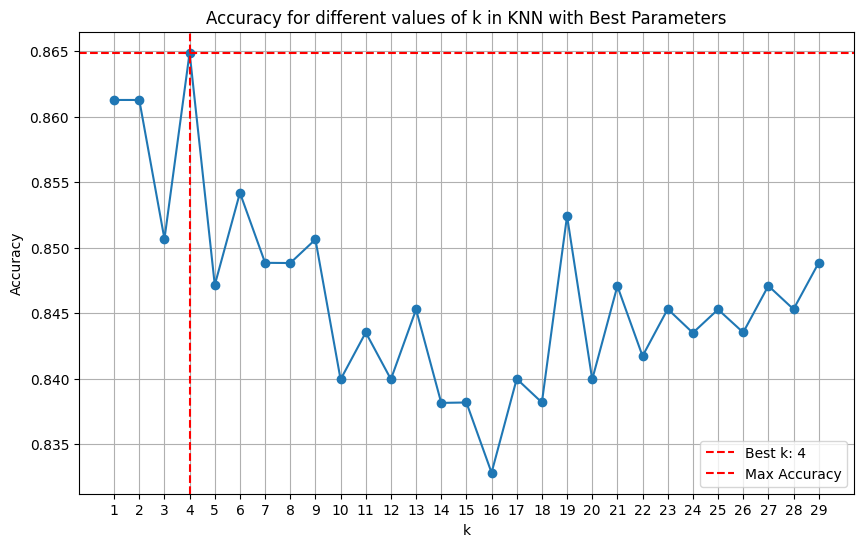

In [71]:
best_params = grid_search.best_params_
k_values = range(1, 30)
average_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=best_params['weights'], metric=best_params['metric'])
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    average_accuracies.append(np.mean(scores))
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of k in KNN with Best Parameters')
plt.grid(True)
best_k = k_values[np.argmax(average_accuracies)]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k: {best_k}')
plt.axhline(max(average_accuracies), color='red', linestyle='--', label='Max Accuracy')
plt.legend()
plt.show()


### Model Evaluation on Training Set

In [32]:
train_scores = {
    'accuracy': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'precision': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='precision').mean(),
    'recall': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='recall').mean(),
    'f1': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='f1').mean(),
    'roc_auc': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='roc_auc').mean()
}
print("Training Set Evaluation Metrics:")
for metric, score in train_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")

Training Set Evaluation Metrics:
Accuracy: 0.8649
Precision: 0.8352
Recall: 0.9111
F1: 0.8710
Roc_auc: 0.9234


### Final Model Evaluation on Test Set

In [33]:
y_pred = best_knn.predict(X_test)
test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
}
print("\nTest Set Evaluation Metrics:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.8158
Precision: 0.6809
Recall: 0.8421
F1: 0.7529
Roc_auc: 0.8774


### Compute confusion matrix

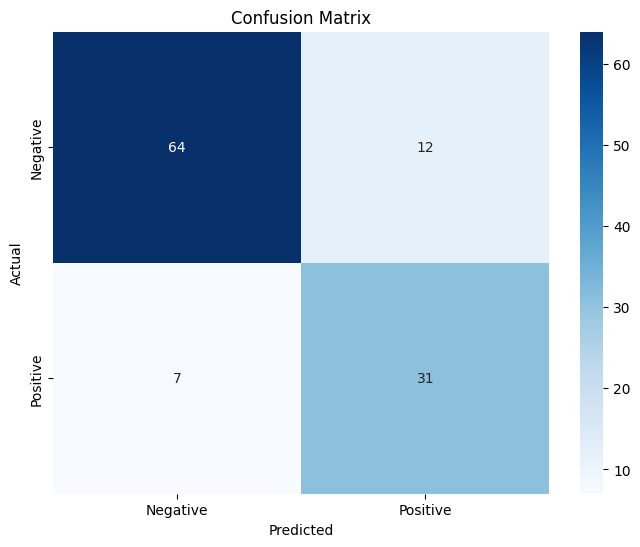

In [37]:

cm_pred = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pred, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()     

In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        76
           1       0.72      0.82      0.77        38

    accuracy                           0.83       114
   macro avg       0.81      0.83      0.82       114
weighted avg       0.84      0.83      0.84       114



### Receiver Operating Characteristic (ROC) Curve

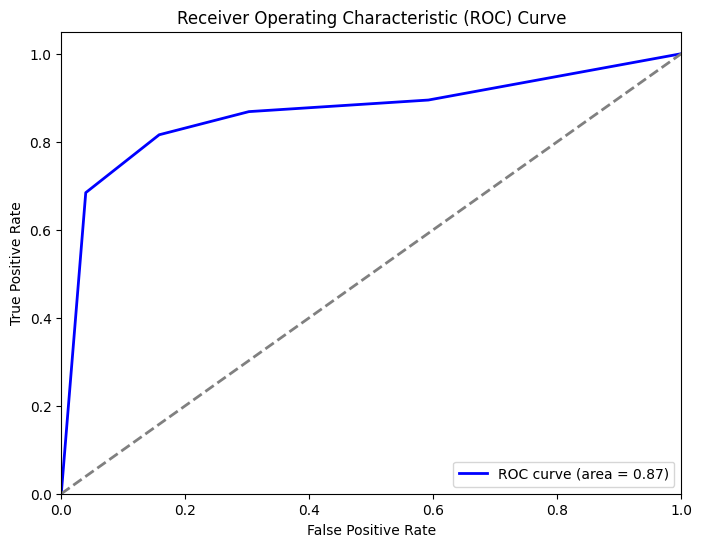

In [39]:
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
### Feature impovment and selection 

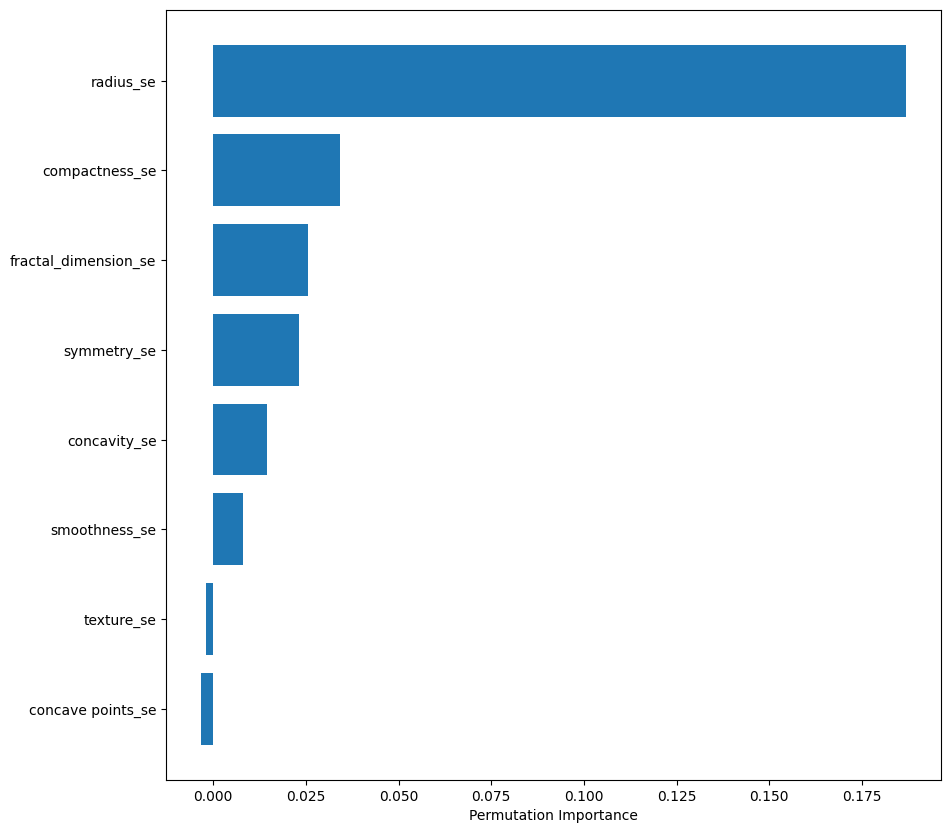

In [41]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=30)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

<div class="alert alert-warning">

### English
**Positive Values:** A feature with a positive permutation importance value suggests that when the values of this feature are randomly shuffled, it doesn't significantly change the model's performance. This indicates that the information contained in this feature is important for making predictions. The model relies on the actual values of this feature to some degree.

**Negative Values:** Conversely, a feature with a negative permutation importance value indicates that when the values of this feature are shuffled, it leads to significant fluctuations in the model's performance. This suggests that the specific values of the feature may not be as important as their order or pattern. Negative values can be a sign of overfitting, redundancy with other features, or noise in the dataset. The model might perform better when the feature's relationship with the target outcome is disrupted.

### Deutsch
**Positive Werte:** Ein Merkmal mit einem positiven Permutationswichtigkeitswert deutet darauf hin, dass, wenn die Werte dieses Merkmals zufällig gemischt werden, dies die Leistung des Modells nicht signifikant verändert. Dies zeigt an, dass die in diesem Merkmal enthaltenen Informationen wichtig für die Vorhersage sind. Das Modell verlässt sich bis zu einem gewissen Grad auf die tatsächlichen Werte dieses Merkmals.

**Negative Werte:** Umgekehrt deutet ein Merkmal mit einem negativen Permutationswichtigkeitswert darauf hin, dass, wenn die Werte dieses Merkmals gemischt werden, dies zu signifikanten Schwankungen in der Leistung des Modells führt. Dies legt nahe, dass die spezifischen Werte des Merkmals möglicherweise nicht so wichtig sind wie ihre Ordnung oder ihr Muster. Negative Werte können ein Zeichen von Überanpassung, Redundanz mit anderen Merkmalen oder Rauschen im Datensatz sein. Das Modell könnte besser abschneiden, wenn die Beziehung des Merkmals zum Zielergebnis gestört ist.

</div>
d.

<div class="alert alert-warning">

### English
The model is learning the patterns that might arise from the order in which the data was collected or organized. To solve this problem, shuffling the data could be used.

### Deutsch
Das Modell lernt die Muster, die sich aus der Reihenfolge ergeben können, in der die Daten gesammelt oder organisiert wurden. Um dieses Problem zu lösen, könnte das Mischen der Daten verwendet werden.

</div>




In [42]:
### Save the model

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', best_knn)
])

In [45]:

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'KNN.pkl')

['KNN.pkl']

In [66]:
data = {
  
    'radius_se': [0.3892, 0.3534, 0.5835, 0.2094, 0.3777],
    'texture_se': [1.046, 1.326, 1.377, 0.7636, 1.462],
    'smoothness_se': [0.007001, 0.005889, 0.006622, 0.007123, 0.008456], 
    'compactness_se': [0.002345, 0.003567, 0.004678, 0.002569, 0.003456], 
    'concavity_se': [0.001234, 0.001456, 0.001789, 0.001234, 0.001567], 
    'concave points_se': [0.009046, 0.01140, 0.01448, 0.01132, 0.00000],
    'symmetry_se': [0.02005, 0.01503, 0.01486, 0.02625, 0.02882],
    'fractal_dimension_se': [0.002830, 0.003338, 0.005412, 0.004726, 0.006872],

}

df_sample= pd.DataFrame(data)
df_sample_scaled= scaler.fit_transform(df_sample)

In [67]:
loaded_pipeline = joblib.load('KNN.pkl')
predictions = loaded_pipeline.predict(df_sample_scaled)
predictions

array([0, 0, 1, 0, 0], dtype=int64)